# Part II - Presentation of findings from the exploration of Loan Data from Prosper
## by Chikadibia F. Ezeh

## Investigation Overview

> The overall goal of this presentation is to show the result of the explotaions performed on loan data from prosper. The exploration was performed to investigate the overall performance of the listed credits in the dataset.

> It was found that most of the prevous debts of borrowers in the listing were consolidated. i.e credits listed to settle prevous debts, as such, the overall credit performance picture was a good one.


## Dataset Overview

> The loan data from prosper is a dataset which contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

>The original dataset had the shape (113937, 81), i.e. 113,937 loans with 81 attributes (columns). preliminary data wrangling restricted the shape to (96187, 16), 16 selected attributes (columns) from the original dataset (among which includes both discrete and continuous variables), few of which were eventualy dropped and 3 attributes (MedianScore, CreditRating, listingcategory) are outcomes from feature engineering.

In [49]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [50]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosper_loan.csv')

In [51]:
# make a copy of dataset to preserve the original
cp_loans=loans.copy()

In [52]:
# make a list of selected variables/columns from the dataset
select_variables = ['ListingNumber','ListingCategory (numeric)','CreditScoreRangeLower','CreditScoreRangeUpper','BorrowerAPR','EmploymentStatus',
                    'AmountDelinquent','DebtToIncomeRatio','IncomeRange','RevolvingCreditBalance','AvailableBankcardCredit',
                    'OpenRevolvingMonthlyPayment','LoanStatus','BankcardUtilization','CurrentCreditLines']

In [53]:
#make a dataframe from selected variables
select_df = cp_loans[select_variables]
select_df = select_df.dropna()

In [54]:
# change data types of columns as required
select_df= select_df.astype({'CreditScoreRangeLower':'int64','CreditScoreRangeUpper':'int64','ListingNumber':'object'})

# create credit score range list from CreditScoreRangeLower and CreditScoreRangeUpper columnss
select_df['MedianScore'] = [int(np.median(np.arange(x,y+1))) for x,y in zip(select_df['CreditScoreRangeLower'],select_df['CreditScoreRangeUpper'])]


In [55]:
# create non numeric category column and drop the numeric category table
conditions = [
    (select_df['ListingCategory (numeric)']== 0), (select_df['ListingCategory (numeric)']== 1),
    (select_df['ListingCategory (numeric)']== 2), (select_df['ListingCategory (numeric)']== 3),
    (select_df['ListingCategory (numeric)']== 4), (select_df['ListingCategory (numeric)']== 5),
    (select_df['ListingCategory (numeric)']== 6), (select_df['ListingCategory (numeric)']== 7),
    (select_df['ListingCategory (numeric)']== 8), (select_df['ListingCategory (numeric)']== 9),
    (select_df['ListingCategory (numeric)']== 10), (select_df['ListingCategory (numeric)']== 11),
    (select_df['ListingCategory (numeric)']== 12), (select_df['ListingCategory (numeric)']== 13),
    (select_df['ListingCategory (numeric)']== 14), (select_df['ListingCategory (numeric)']== 15),
    (select_df['ListingCategory (numeric)']== 16), (select_df['ListingCategory (numeric)']== 17),
    (select_df['ListingCategory (numeric)']== 18), (select_df['ListingCategory (numeric)']== 19),
    (select_df['ListingCategory (numeric)']== 20)
]

values = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use',
          'Auto','Other','Baby and Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans',
          'Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans']
select_df['ListingCategory'] = np.select(conditions,values,default='Not in Category')

select_df.drop('ListingCategory (numeric)', axis =1, inplace = True)

select_df.drop(['CreditScoreRangeLower','CreditScoreRangeUpper'], axis = 1, inplace=True)

In [56]:
# create base color for plots
base_clolor = sns.color_palette()[0]

In [57]:
# create plot labels
def labels_1 (x,y,t,a):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.xticks(rotation = a)

## Univariate visualization for the transformed EmploymentStatus


### Transformation of the employment status variable

> The employment status column contains several kinds (employed, full-time, part time and self employed). The employmnet status column was transformed to merge these various kinds of eployments into one called 'Employed' and we now have employment status to be either employed, not employed, others, or retired.

In [58]:
# Transforming The employment status column
conditions = [
    (select_df['EmploymentStatus'] == 'Employed')|(select_df['EmploymentStatus'] == 'Full-time')|(select_df['EmploymentStatus'] == 'Part-time')|
    (select_df['EmploymentStatus'] == 'Self-employed'),
    (select_df['EmploymentStatus'] == 'Not employed'),
    (select_df['EmploymentStatus'] == 'Other'),
    (select_df['EmploymentStatus'] == 'Retired')
]
    

values = ['Employed', 'Not employed','Other','Retired']
select_df['EmploymentStatus'] = np.select(conditions, values, default = 'NA' )


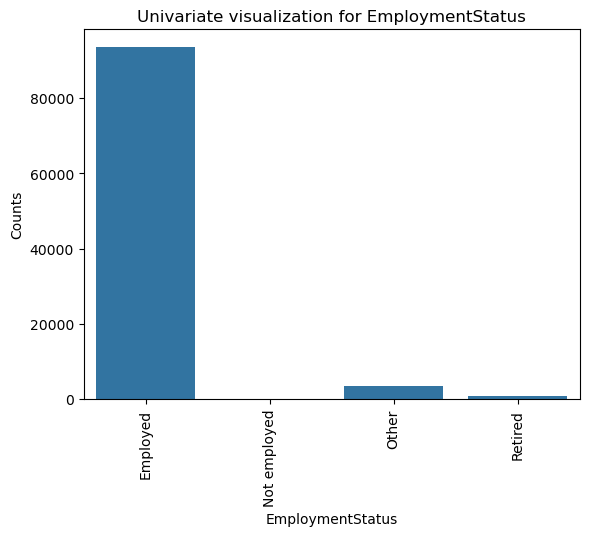

In [59]:
# Univariate visualization for EmploymentStatus
plot_order = select_df['EmploymentStatus'].value_counts().index.sort_values()
sns.countplot(data = select_df, x = 'EmploymentStatus', order = plot_order, color = base_clolor )
labels_1('EmploymentStatus','Counts','Univariate visualization for EmploymentStatus',90)

## Univariate visualization for transformed LoanStatus

### Transformation of loan status variable

> The loan status column contained various forms of delinquencies according to whether defaulted and the number of days past due. These various kinds of deliquency were transformed to be called 'Delinquent'. Also, the credits in the final repayment stage were merged with current ones so that the loan status are now, cancelled, completed, charged off, current and delinquent.

In [60]:
# Transforming The loan status column
conditions = [
    (select_df['LoanStatus'] == 'Past Due (1-15 days)')|(select_df['LoanStatus'] == 'Defaulted')|(select_df['LoanStatus'] == 'Past Due (16-30 days)')|
    (select_df['LoanStatus'] == 'Past Due (31-60 days)')|(select_df['LoanStatus'] == 'Past Due (61-90 days)')|(select_df['LoanStatus'] == 'Past Due (91-120 days)')|(select_df['LoanStatus'] == 'Past Due (>120 days)'),
    (select_df['LoanStatus'] == 'Current')|(select_df['LoanStatus'] == 'FinalPaymentInProgress'),
    (select_df['LoanStatus'] == 'Completed'),
    (select_df['LoanStatus'] == 'Chargedoff'),
    (select_df['LoanStatus'] == 'Cancelled')
]

values = ['Delinquent','Current','Completed','Chargedoff','Cancelled']
select_df['LoanStatus'] = np.select(conditions, values, default=select_df['LoanStatus'])


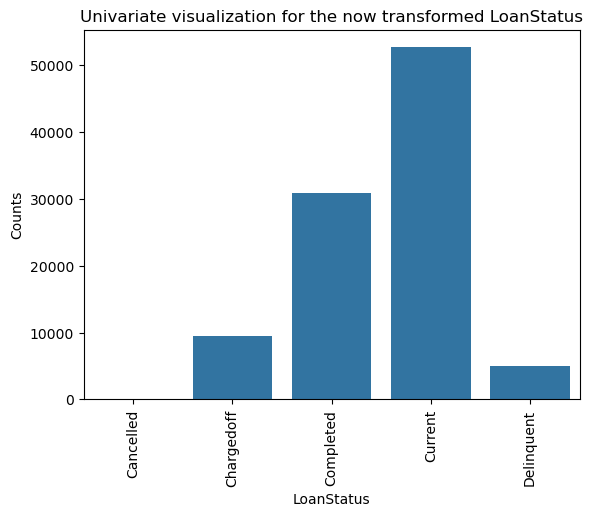

In [61]:
# Univariate visualization for the now transformed LoanStatus
plot_order = select_df['LoanStatus'].value_counts().index.sort_values()
sns.countplot(data = select_df, x = 'LoanStatus', order = plot_order, color = base_clolor )
labels_1('LoanStatus','Counts','Univariate visualization for the now transformed LoanStatus',90);

## Visualization for credit ratings



### Transformation of upper and lower credit scores to median score and then to credit ratings

> The original dataset contained two different columns for credit scores (upper credit score and lower credit score). The medians for these credit scores were taken as good representatives of the credit score intervals resulting to one column called 'medianscore'. On this median score column, the FICO credit score rating system was applied to get another column called 'Creditrating'. It is from this credit column that visualization was done.

In [62]:
# Apply FICO credit score ratings
#FICO_SCORE = {'Poor': [300,579],'Fair': [580,669],'Good': [670,739],'Very Good': [740,799],'Exceptional':[800,850]}
conditions = [
    (select_df['MedianScore'] < 300) | (select_df['MedianScore']>=300) & (select_df['MedianScore']<580),
    (select_df['MedianScore']>=580) & (select_df['MedianScore']<670),
    (select_df['MedianScore']>=670) & (select_df['MedianScore']<740),
    (select_df['MedianScore']>=740) & (select_df['MedianScore']<800),
    (select_df['MedianScore']>=800) & (select_df['MedianScore']<851) | (select_df['MedianScore'] > 850)
]
    
values = ['Poor','Fair','Good','Very Good','Exceptional']
select_df['CreditRating'] = np.select(conditions,values,default= 'NA')


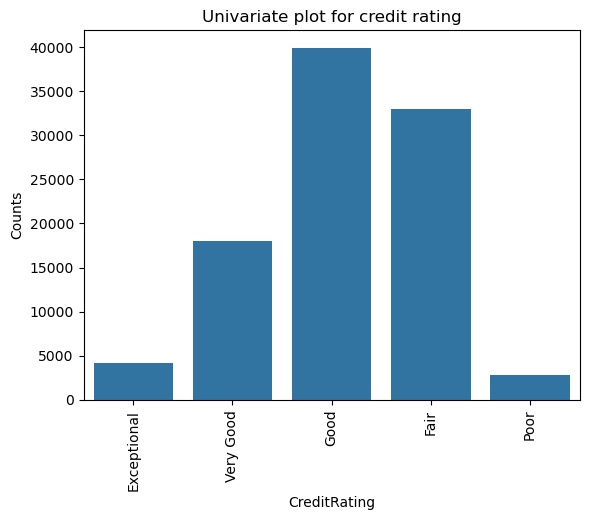

In [63]:
# Univariate plot for credit rating
plot_order = ['Exceptional','Very Good','Good','Fair','Poor']
sns.countplot(data = select_df, x = 'CreditRating', order = plot_order, color = base_clolor )
labels_1('CreditRating','Counts','Univariate plot for credit rating',90);

## Visualization to compare employment status and credit rating

> The employment status and the credit rating were compared to view the relationship between them. We found that the credit ratings were generally good. It is speculated that the reason why the credit ratings are generally good is customers involved in the listed credits borrowed funds for the consolidation of old debts. These consolidation was confirmed, given that majority of the loans given to the employed customers are current and are found in the debt consolidation category.

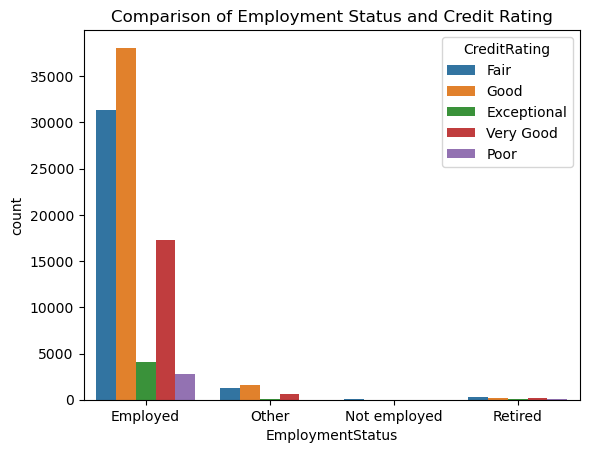

In [64]:
# compare two qualitative variables (EmploymentStatus and CreditRating) clustered bar chart
sns.countplot(data=select_df, x='EmploymentStatus',hue='CreditRating')
plt.title('Comparison of Employment Status and Credit Rating');

## Relationship between CreditRating, ListingCategory, LoanStatus

> It is confirmed that majority of the credits currently running are for debt consolidation

> A significant count of the credit items are charged off

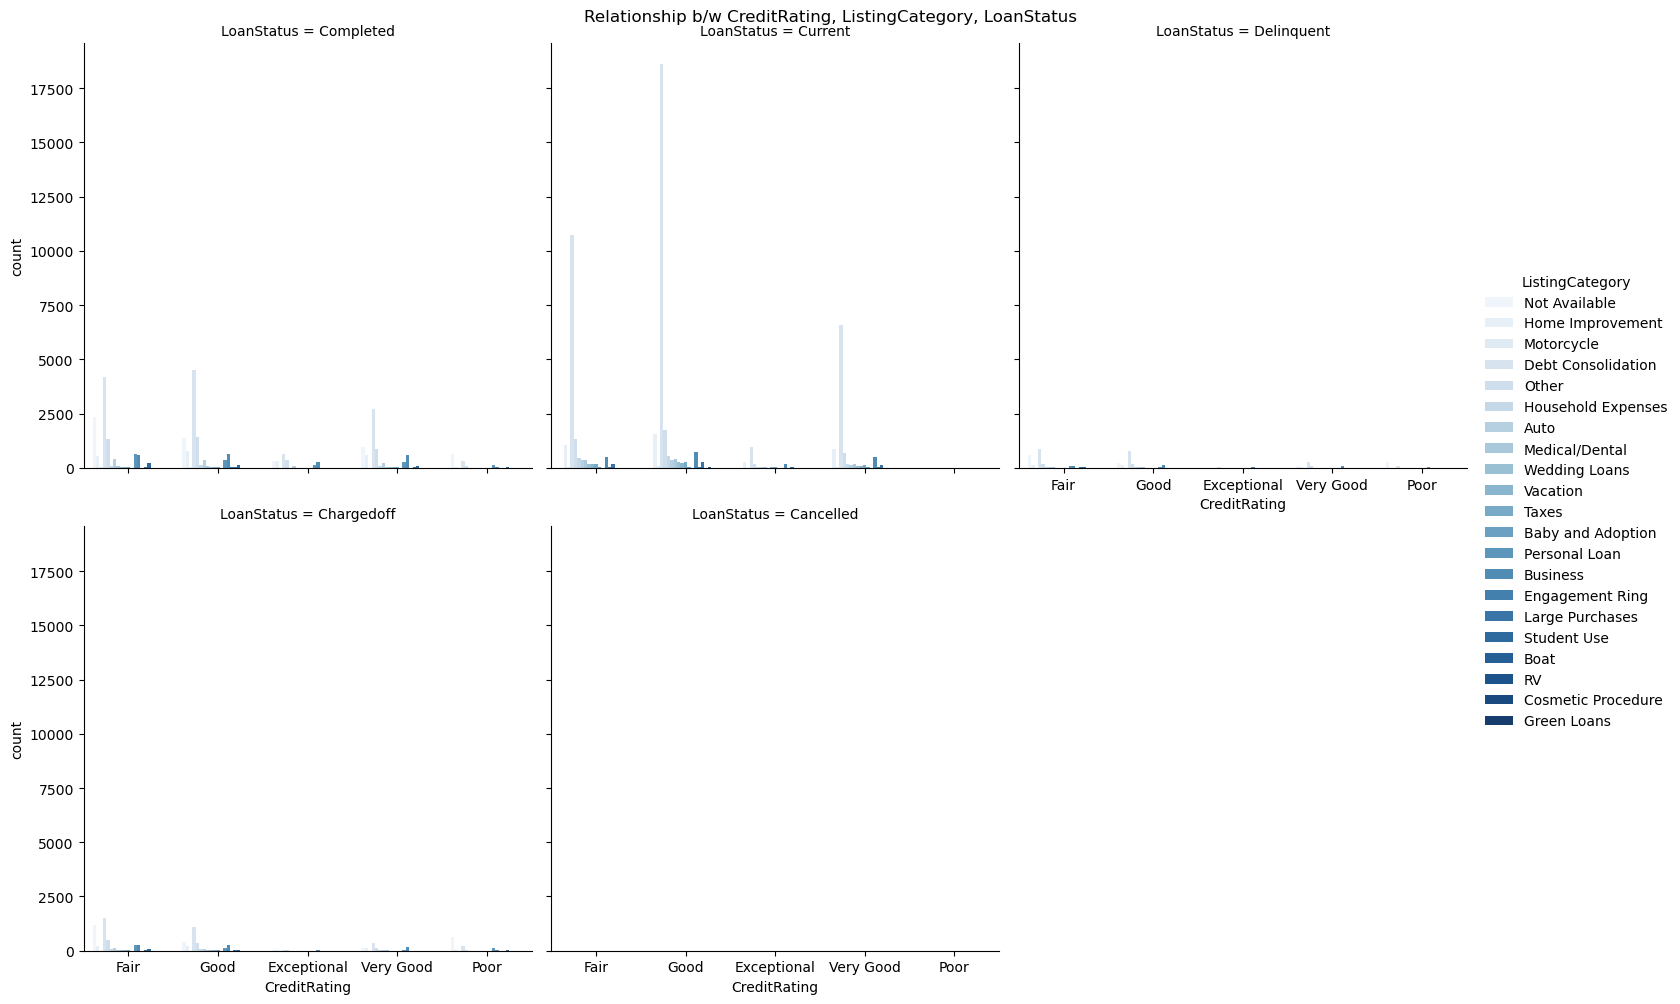

In [65]:
# What is Relationship between CreditRating, ListingCategory, LoanStatus like
p = sns.catplot(data = select_df,x = 'CreditRating', hue = 'ListingCategory', col = 'LoanStatus',
            kind = 'count', palette = 'Blues', col_wrap = 3)
p.fig.suptitle('Relationship b/w CreditRating, ListingCategory, LoanStatus', y=1.0);

## Visualization to compare RevolvingCreditBalance, OpenRevolvingMonthlyPayment, and AmountDelinquent

> RevolvingCreditBalance and OpenRevolvingMonthlyPayment have a very strong positive correlation

> Amounts Delinquent are more concetrated in the lower range, say 0 to 100,000 and sparsely distributed as we go up the legend

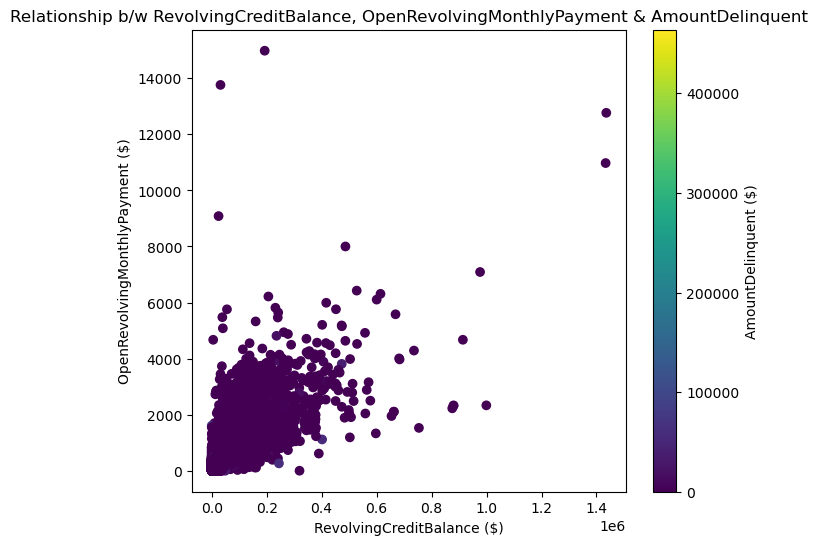

In [66]:
# Compare RevolvingCreditBalance, OpenRevolvingMonthlyPayment, and AmountDelinquent
plt.figure(figsize = [7,6])
plt.scatter(data = select_df, x = 'RevolvingCreditBalance', y = 'OpenRevolvingMonthlyPayment',
                c = 'AmountDelinquent')
plt.colorbar(label = 'AmountDelinquent ($)')
labels_1('RevolvingCreditBalance ($)', 'OpenRevolvingMonthlyPayment ($)',
         'Relationship b/w RevolvingCreditBalance, OpenRevolvingMonthlyPayment & AmountDelinquent',0)


## Visualization comparing LoanStatus, AmountDelinquent, and EmploymentStatus

> The amount delinquent accross all employment status have majorly charged off and completed loan status in that order

> The credit amount delinquent with current loan status are concentrated on others and retired employment status

> The amount delinquent with Cancelled and Delinquent loan status are very insignificant


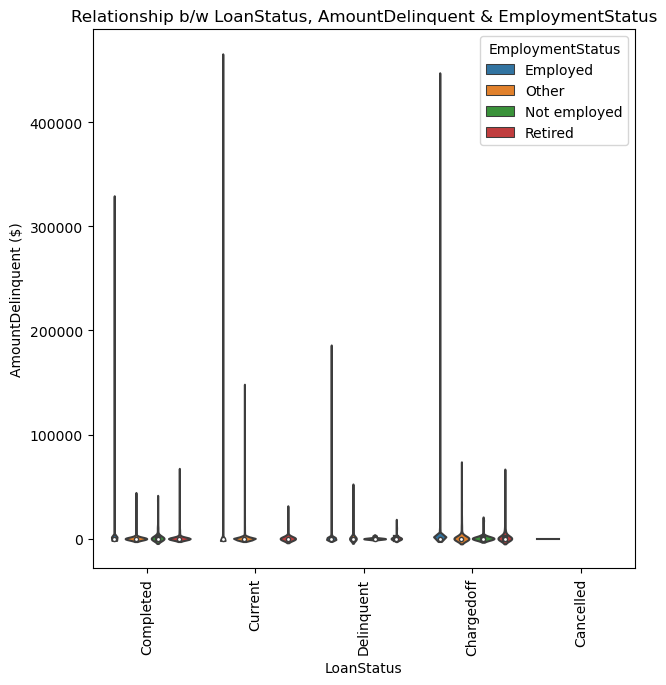

In [67]:
# Compare LoanStatus, AmountDelinquent, and EmploymentStatus
plt.figure(figsize = [7, 7])
sns.violinplot(data=select_df, x='LoanStatus', y='AmountDelinquent', hue='EmploymentStatus')
labels_1('LoanStatus','AmountDelinquent ($)','Relationship b/w LoanStatus, AmountDelinquent & EmploymentStatus',90)

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [68]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_presentation.ipynb to slides
[NbConvertApp] Writing 1020941 bytes to Part_II_slide_deck_presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filena